# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$. <b>Hint:</b> The function input is a vector of labels and the function should return the entropy.

In [2]:
# def entropy(y):
#     ### WRITE YOUR CODE HERE ###
    
# information theory
from collections import Counter

normalize = lambda p: p / p.sum()
# cross entropy or entropy over discrete distributions
cross_ent = lambda p, q= None: - np.dot(p, np.log2(p if q is None else q))
# joint entropy or entropy over discrete variables
jnt_ent = lambda x, y= None: cross_ent(normalize(np.array(list(Counter(x if y is None else zip(x, y)).values()))))
# H( y | x )
c_ent = lambda y, x: jnt_ent(x, y) - jnt_ent(x)
# H( p || q )
r_ent = lambda p, q: cross_ent(p, q) - cross_ent(p)
# I( x ; y)
minf = lambda x, y: jnt_ent(x) + jnt_ent(y) - jnt_ent(x, y)

# In[ ]:

entropy = jnt_ent

Check if your solution is correct:

In [4]:
try:
    assert np.allclose(entropy(np.array([1,1,0,0])), 1.)
    assert np.allclose(entropy(np.array([0,0])), 0.)
    assert np.allclose(entropy(np.array([1,1,0,0,1,1])), 0.91829586029052734)
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [1,2,3,4,5]$ and label $y=[1,0,0,0,0,0]$ would result in the lists 
* $x_{left} = [3,4,5]$, $y_{left} = [0,0,0]$ (for $x > t$) and
* $x_{right} = [1,2]$, $y_{right} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0,0]) - (0.6 * \textbf{entropy}([0,0,0]) + (0.4 * \textbf{entropy}([1,0]))$

In [5]:
# def info_gain(x,y,t):
#     ### WRITE YOUR CODE HERE ###
info_gain = lambda x, y, t: minf((x <= t), y)

Check if your solution is correct:

In [7]:
try:
    x = np.array([1,2,3,4,5,6,7,8,9,10])
    y = np.array([1,1,1,1,1,0,0,0,0,0])
    assert np.allclose(info_gain(x, y, 1), 0.10803163030328733)
    assert np.allclose(info_gain(x, y, 3), 0.39581562117481894)
    assert np.allclose(info_gain(x, y, 5), 1.)
    assert np.allclose(info_gain(x, y, 6), 0.60998651623672373)
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets. The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="dataset.png" width="600"/>

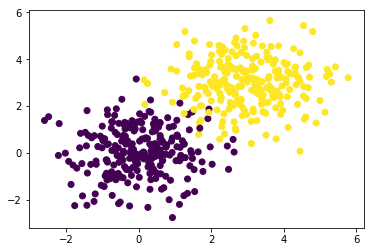

In [8]:
from sklearn.datasets import make_blobs
### WRITE YOUR CODE HERE ###
X, label = make_blobs(n_samples= 500, centers= ((0,0), (3,3)))
plt.scatter(X[:,0], X[:,1], c= label)
plt.show()

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [11]:
from functools import partial
def find_best_split(x,y):
    ### WRITE YOUR CODE HERE ###
    r = np.array(sorted(set(x)))
    return r[np.argmax(np.apply_along_axis(partial(info_gain, x, y), 1, r.reshape(-1, 1)))]

Check if your solution is correct:

In [12]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:
<img src="split.png" width="600"/>
* Which split would you prefer, and why?

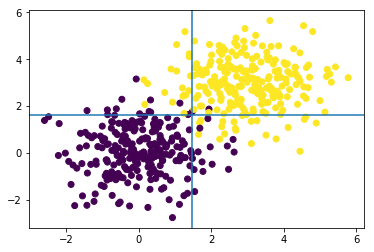

0.6520856689725207

In [13]:
x_best = find_best_split(X[:,0],label)
y_best = find_best_split(X[:,1],label)
### WRITE YOUR CODE HERE ###
plt.scatter(X[:,0], X[:,1], c= label)
plt.axvline(x_best)
plt.axhline(y_best)
plt.show()

info_gain(X[:,0], label, x_best)
info_gain(X[:,1], label, y_best)

## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X, label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:
<img src="dec.png" width="600"/>
* Can you find learning parameter for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

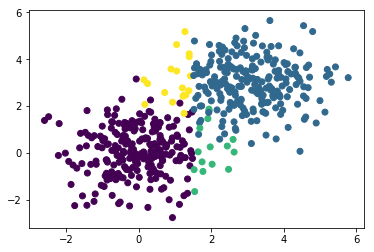

In [16]:
### WRITE YOUR CODE HERE ###
pred = clf_tree.predict(X)
corr = pred == label
miss = ~corr

plt.scatter(X[:,0], X[:,1], c= label + (2 * miss))
plt.show()